In [1]:
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt

import pickle ## 데이터 모델 저장하기, 불러오기
import gzip ## 파일 압축하기, 압축풀기
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# 미리 구축한 머신러닝 모델 다운로드 받기

datapath = 'https://github.com/mchoimis/financialML/raw/main/xai/'

In [13]:
# 저장한 데이터와 모델 불러오기

modelpath = 'C:/Users/jjdj0/OneDrive/바탕 화면/classifiy/part-6. 머신러닝 실전 모델링과 xai/02. 데이터셋/가공데이터/'

with gzip.open(modelpath + 'data00.pickle','rb') as f:
    data00 =  pickle.load(f)
with gzip.open(modelpath + 'data00_X_train.pickle','rb') as f:
    X_train = pickle.load(f)
with gzip.open(modelpath + 'data00_X_test.pickle','rb') as f:
    X_test =  pickle.load(f)    
with gzip.open(modelpath + 'data00_y_train.pickle','rb') as f:
    y_train = pickle.load(f)    
with gzip.open(modelpath + 'data00_y_test.pickle','rb') as f:
    y_test = pickle.load(f)  

In [15]:
# Logistic Regression 이진분류 모델 불러오기
with open(modelpath + 'logreg00.pkl', 'rb') as file:
    logreg =  pickle.load(file)

In [16]:
# Logistic Regression 이진분류 모델의 회귀계수 확인하기

logreg.coef_

array([[ 0.45435118, -0.08929983,  0.88011855, -0.37428934, -0.01347698,
        -0.19718355,  0.08082303,  0.43380857,  2.34127172,  0.27435968,
         0.37244795,  0.01498249]])

In [18]:
# 데이터 형태 바꾸기

coef = sum(logreg.coef_)
coef

array([ 0.45435118, -0.08929983,  0.88011855, -0.37428934, -0.01347698,
       -0.19718355,  0.08082303,  0.43380857,  2.34127172,  0.27435968,
        0.37244795,  0.01498249])

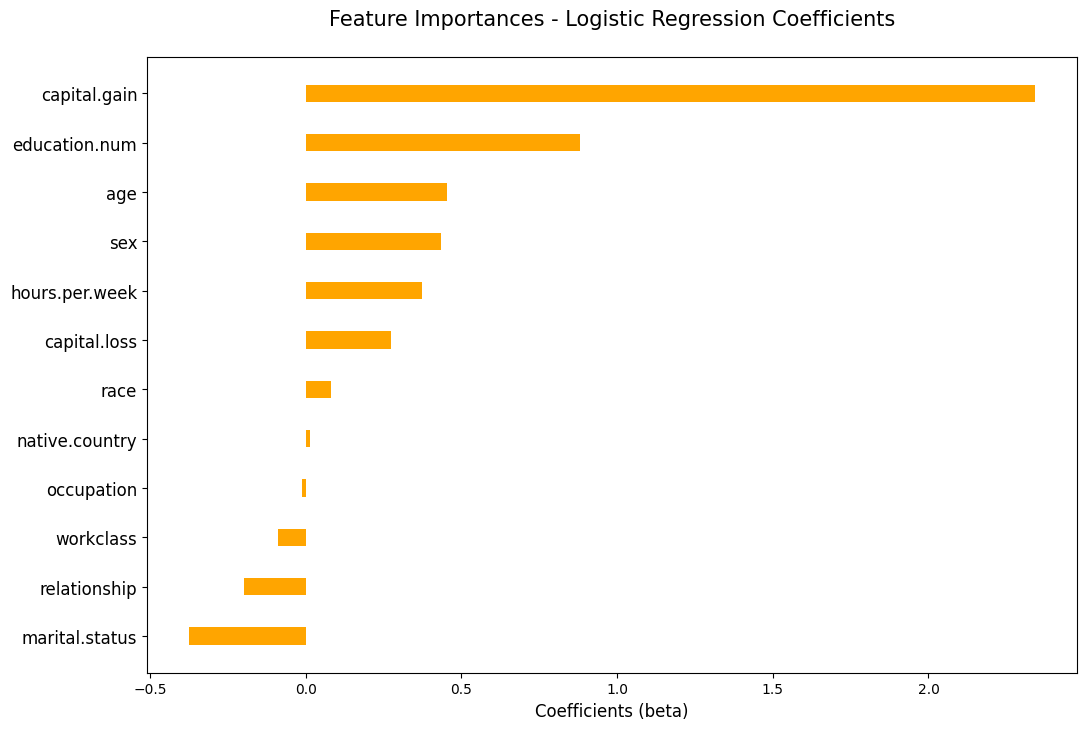

In [19]:
# Logistic Regression 이진분류 모델의 회귀계수 시각화 하기

indices =  np.argsort(coef)  # 회귀계수 크기 순으로 정렬

plt.figure(figsize=(12, 8))
plt.barh(X_test.columns, coef[indices], .35, color='orange', align='center')
plt.yticks(X_test.columns, X_test.columns[indices], fontsize=12)
plt.xlabel('Coefficients (beta)', fontsize=12)
plt.title('Feature Importances - Logistic Regression Coefficients\n', fontsize=15)
plt.show()

In [20]:
# 학습에 사용할 데이터를 로드하고 압축 풀기
with gzip.open(modelpath + 'data00_X_train.pickle','rb') as f:
    X_train = pickle.load(f)
with gzip.open(modelpath + 'data00_X_test.pickle','rb') as f:
    X_test = pickle.load(f)    

In [21]:
# Random Forest Classifier를 이용하여 모델 fitting 하기 

from sklearn.ensemble import RandomForestClassifier

rfc =  RandomForestClassifier(random_state = 42).fit(X_train, y_train) ###

In [22]:
# 모델 저장하기

pickle.dump(rfc, open(modelpath + 'rfc00.pkl', 'wb' ))

In [23]:
# 모델 불러오기
with open(modelpath + 'rfc00.pkl', 'rb') as file:
    rfc =  pickle.load(file)

In [24]:
# Random Forest 이진분류 모델의 피처 중요도 확인하기 # MDI

importances =  rfc.feature_importances_
importances 

array([0.2120391 , 0.04862643, 0.14503283, 0.05946474, 0.08394042,
       0.12762821, 0.01853742, 0.01328217, 0.12340054, 0.0394054 ,
       0.10993623, 0.0187065 ])

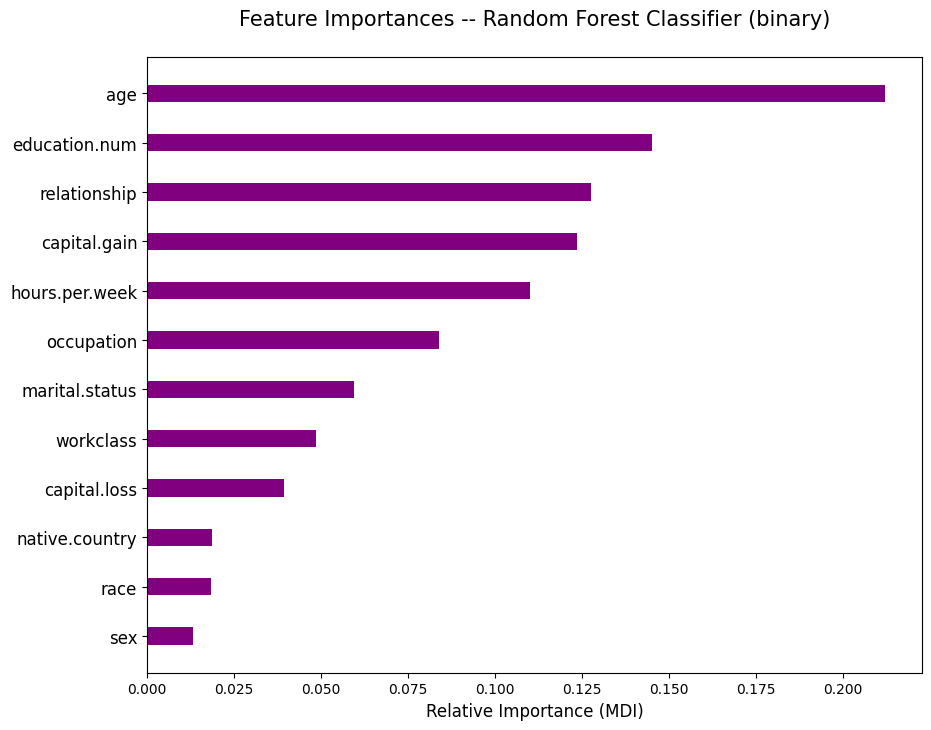

In [25]:
# Random Forest 이진분류 모델의 피처 중요도 시각화 하기

indices = np.argsort(importances)     # 중요도 크기 순으로 정렬

plt.figure(figsize=(10, 8))

plt.barh(X_test.columns, importances[indices], .35, color='purple', align='center')
plt.yticks(X_test.columns, X_test.columns[indices], fontsize=12)

plt.xlabel('Relative Importance (MDI)', fontsize=12)
plt.title('Feature Importances -- Random Forest Classifier (binary)\n', fontsize=15)
plt.show()

In [31]:
# Eli5를 이용하여 Random Forest 모델의 Permutation Importance 구하기
## (먼저 패키지를 설치해주세요)

import eli5

from eli5.sklearn import PermutationImportance

imp = PermutationImportance(rfc, random_state=1).fit(X_test, y_test)
imp

ModuleNotFoundError: No module named 'sklearn.feature_extraction'